<a href="https://colab.research.google.com/github/JalesBussinguer/Data_Science_Studies/blob/master/Analise_processadores_CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de custo-benefício de processadores**

#### **Problema**: Preciso montar um PC que tenha especificações técnicas capazes de "rodar" jogos com boa qualidade e executar múltiplas tarefas com rapidez ("sem travar").

#### **Objetivo (critério de compra)**: Encontrar um processador que apresente uma performance balanceada para jogos (gaming) e multitarefas (multitasking) levando-se em conta o custo-benefício.

**Autor**: **Jales Bussinguer**

#### ***Disclaimer:*** As análises apresentadas neste notebook foram construídas para fins didáticos e de estudo de data science com Python. 

#### Para se adequar ao objetivo proposto, o conteúdo do dataset original foi modificado, não sendo utilizadas algumas informações nele contidas.

-> Dataset original: https://docs.google.com/spreadsheets/d/1Mf1douNT0ZK-MsL54UUfxGVTvJFdlDJF4HiEr_KJwdE/edit#gid=1868864095

#### **Primeiramente, antes de começarmos as análises, vamos importar as bibliotecas que serão utilizadas para tratar os dados e executar as tarefas**:

In [1]:
# Importação das bibliotecas que serão usadas

from google.colab import files # Módulo do Google Colab para ler/abrir arquivos da máquina local
import pandas as pd # Biblioteca para trabalhar com dataframes e tabelas
import io # Biblioteca padrão do Python relacionada a Inputs e Outputs (IO)
import numpy as np # Biblioteca para trabalhar com dados numéricos e matriciais
import seaborn as sns # Biblioteca de plotagem de gráficos (baseada no Matplotlib)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Agora vamos importar o dataset da máquina local para o Google Colab**:

In [2]:
# Importação do dataset da máquina local para o Colab

data_gaming = files.upload()

gaming = pd.read_csv(io.BytesIO(data_gaming['Hierarquia_CPU.csv']), sep=";")


Saving Hierarquia_CPU.csv to Hierarquia_CPU (4).csv


In [3]:
# Conferindo o dataset

gaming.head()

,CPU,Gaming_Score,Custo_GS,CB_GS,Tasking_Score,Custo_TS,CB_TS,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,i9 10900K,1.00,4000.0,0.60,0.96,4000.0,0.58,NaN,NaN,NaN,NaN,NaN
1,i9 9900KS,0.99,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,i7 10700K,0.97,2900.0,0.70,0.91,2800.0,0.69,NaN,NaN,NaN,NaN,NaN
3,i7 10700KF,0.97,NaN,NaN,0.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,i7 10700,0.97,2800.0,0.71,0.90,2800.0,0.68,NaN,NaN,NaN,NaN,NaN


### **O que significam as colunas do dataset**:
#### 1 - CPU: Os modelos de processadores. São listados modelos das marcas Intel e AMD;
#### 2 - Gaming_Score e Tasking_Score: Um valor entre 0 e 1 que representa a performance do processador no quesito jogos (gaming) e multitarefas (tasking). Quanto mais próximo de 1, melhor a performance;
#### 3 - Custo_GS e Custo_TS: O preço estimado do processador (em reais);
#### 4- CB_GS e CB_TS: Um valor entre 0 e 1 que representa o custo-benefício do processador. Quanto mais próximo de 1, melhor o custo-benefício.

#### **Repare que existem colunas indesejadas no dataset. Nesse caso, precisamos removê-las. Para tal, utilizaremos a função .drop() da biblioteca Pandas**:

In [4]:
# Removendo colunas indesejadas no dataset

gaming.drop(columns=['Unnamed: 7', 'Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'], inplace=True)

# O argumento "inplace=True" determina que essa remoção seja feita no dataset original.
gaming.head()

,CPU,Gaming_Score,Custo_GS,CB_GS,Tasking_Score,Custo_TS,CB_TS
0,i9 10900K,1.00,4000.0,0.60,0.96,4000.0,0.58
1,i9 9900KS,0.99,NaN,NaN,0.92,NaN,NaN
2,i7 10700K,0.97,2900.0,0.70,0.91,2800.0,0.69
3,i7 10700KF,0.97,NaN,NaN,0.91,NaN,NaN
4,i7 10700,0.97,2800.0,0.71,0.90,2800.0,0.68


#### **Agora que retiramos as colunas indesejadas, vamos procurar por linhas que contenham valores nulos. Para tal, vamos utilziar a função .isnull() da biblioteca Pandas**:

In [5]:
# Conferindo se há valores nulos nas colunas

gaming.isnull()

# A função .isnull() retorna um booleano que indica se o valor contido em uma coluna/linhas é nulo (True) ou não (False).
# Nesse caso, diversas colunas apresentam valores nulos que precisam ser retirados da análise.

,CPU,Gaming_Score,Custo_GS,CB_GS,Tasking_Score,Custo_TS,CB_TS
0,False,False,False,False,False,False,False
1,False,False,True,True,False,True,True
2,False,False,False,False,False,False,False
3,False,False,True,True,False,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
994,True,True,True,True,True,True,True
995,True,True,True,True,True,True,True
996,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True


#### **Repare que diversas linhas apresentam valores nulos. Sendo assim, processadores que tiverem valores nulos em quaisquer colunas serão desconsiderados da análise. Além disso, muitas linhas com todos os valores nulos que atrapalham nossa análise.**

#### **Para executar este passo, utilziaremos a função .dropna() da biblioteca Pandas**:

In [6]:
gaming.dropna(inplace=True)

# A função .dropna() remove as linhas que contém valores nulos.
# O argumento "inplace=True" determina que essa modificação seja feita no dataset original, e não só uma "retirada de vista".

gaming.head()

,CPU,Gaming_Score,Custo_GS,CB_GS,Tasking_Score,Custo_TS,CB_TS
0,i9 10900K,1.00,4000.0,0.60,0.96,4000.0,0.58
2,i7 10700K,0.97,2900.0,0.70,0.91,2800.0,0.69
4,i7 10700,0.97,2800.0,0.71,0.90,2800.0,0.68
5,i7 9700K,0.97,2700.0,0.72,0.88,2700.0,0.68
6,i9 9900K,0.97,3700.0,0.61,0.91,3700.0,0.59


## **Agora temos um dataset limpo e pronto para executar as análises! :)**

#### Contudo, devido ao fato de termo retirado algumas linhas de nossa análise, os índices estão fora de ordem. Nesse caso, vamos reordená-los:

In [9]:
# Com a utilização da função .reset_index() é criado um novo índice baseado na posição dos valores no dataset.
# Ao utilizá-la é criada uma nova coluna com os valores antigos de índice.
# Dessa forma nosso dataset fica organizado de forma sequencial, facilitando nossa análise.

gaming.reset_index()

,index,CPU,Gaming_Score,Custo_GS,CB_GS,Tasking_Score,Custo_TS,CB_TS
0,0,i9 10900K,1.00,4000.0,0.60,0.96,4000.0,0.58
1,2,i7 10700K,0.97,2900.0,0.70,0.91,2800.0,0.69
2,4,i7 10700,0.97,2800.0,0.71,0.90,2800.0,0.68
3,5,i7 9700K,0.97,2700.0,0.72,0.88,2700.0,0.68
4,6,i9 9900K,0.97,3700.0,0.61,0.91,3700.0,0.59
5,7,i9 9900KF,0.97,3200.0,0.67,0.91,3200.0,0.64
6,8,R9 3900XT,0.95,3600.0,0.62,0.96,3600.0,0.62
7,9,R9 3900X,0.95,3200.0,0.66,0.96,3200.0,0.66
8,10,R9 3950X,0.94,5700.0,0.39,1.00,5700.0,0.43
9,11,i5 10600K,0.94,2000.0,0.78,0.86,2000.0,0.76


#### Perceba que agora nossa análise engloba 46 modelos de processadores cujos dados se mostram viáveis para a análise.

#### **Vamos agora plotar um gráfico "Gaming_Score" vs "Tasking_Score". Dessa forma teremos uma primeira noção da tendência de performances dos processadores levando-se em conta os dois parâmetros.**

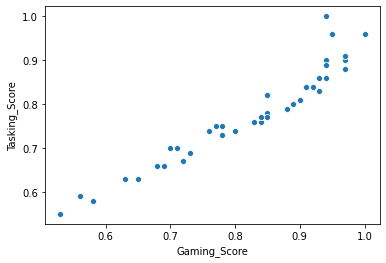

In [10]:
sns.scatterplot(x=gaming['Gaming_Score'], y=gaming['Tasking_Score'])

#### - Perceba que a tendência é aproximadamente linear entre os valores 0.5 e 0.9, indicando uma correlação positiva entre os paramêtros. Isto é, à medida que o gaming score aumenta, o tasking score também aumenta.

#### - Entre os valores 0.9 e 1.0, o tipo de correlação muda. Nessa região, observa-se exemplos de gaming scores que possuem dois ou mais valores distintos de tasking score. Isso indica uma baixa ou nenhuma correlação entre os valores dos parâmetros nessa região.

#### **Vamos olhar agora para cada parâmetro individualmente, plotando o gráfico Score vs Custo-benefício**:

#### - Primeiramente, vamos analisar a performance vs custo-benefício para **jogos**:

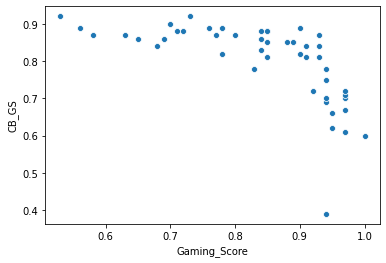

In [15]:
# Gaming

sns.scatterplot(x=gaming['Gaming_Score'], y=gaming['CB_GS'])

#### - Nesse caso, podemos observar que em diversos casos um mesmo gaming score possui diferentes custos-benefício. Isso pode ocorrer em função da marca e modelo do processador.
#### - Também podemos observar que, de forma geral, há uma tendência de correlação negativa entre o aumento de performance e o aumento do custo benefício. Isto é, à medida que o gaming score aumenta, o custo-benefício diminui. Isso nos dá a noção de que o processador ideal para o nosso objetivo não será com o maior gaming score, mas sim com um valor intermediário.

#### Vamos analisar agora a performance vs custo-benefício para **multitarefas**:

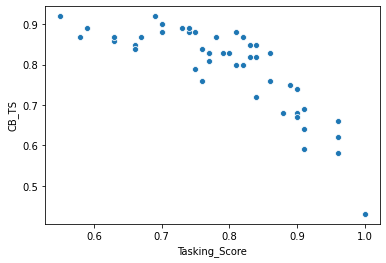

In [18]:
# Tasking

sns.scatterplot(x=gaming['Tasking_Score'], y=gaming['CB_TS'])

#### - Nesse caso, assim como na análise do gaming score, podemos observar que em diversos casos um mesmo tasking score possui diferentes custos-benefício. Isso pode ocorrer em função da marca e modelo do processador.
#### - Também podemos observar que, de forma geral, há uma tendência de correlação negativa entre a performance e o custo benefício. Isto é, à medida que o tasking score aumenta, o custo-benefício diminui. Isso nos dá a noção de que o processador ideal para o nosso objetivo não será com o maior tasking score, mas sim com um valor intermediário.

### **Para analisar então qual processador é o mais interessante para o nosso objetivo será utlizado o seguinte critério**: 

#### - Será feita uma soma dos parâmetros Gaming Score e Tasking Score ponderados pelos seus respectivos custos-benefício. Nesse caso, o processador mais interessante será o que apresentar o maior valor dessa soma.

In [19]:
# Criando a coluna "Soma" e calculando os valores considerados no rankeamento dos processadores.

gaming['Soma'] = (gaming['Gaming_Score'] * gaming['CB_GS']) + (gaming['Tasking_Score'] * gaming['CB_TS'])
gaming.head()

,CPU,Gaming_Score,Custo_GS,CB_GS,Tasking_Score,Custo_TS,CB_TS,Soma
0,i9 10900K,1.00,4000.0,0.60,0.96,4000.0,0.58,1.1568
2,i7 10700K,0.97,2900.0,0.70,0.91,2800.0,0.69,1.3069
4,i7 10700,0.97,2800.0,0.71,0.90,2800.0,0.68,1.3007
5,i7 9700K,0.97,2700.0,0.72,0.88,2700.0,0.68,1.2968
6,i9 9900K,0.97,3700.0,0.61,0.91,3700.0,0.59,1.1286


#### **Uma vez calculadas as somas dos parâmetros de análise, vamos rankear os valores**:

In [21]:
# Rankeando os processadores de acordo com a columa 'Soma'

gaming.sort_values(by=['Soma'], ascending=[False])

,CPU,Gaming_Score,Custo_GS,CB_GS,Tasking_Score,Custo_TS,CB_TS,Soma
17,i5 10400F,0.93,1200.0,0.87,0.83,1200.0,0.85,1.5146
24,R3 3300X,0.90,950.0,0.89,0.81,950.0,0.88,1.5138
22,R5 3600,0.91,1400.0,0.84,0.84,1200.0,0.85,1.4784
19,R5 3600XT,0.93,1700.0,0.81,0.86,1450.0,0.83,1.4671
18,i5 10400,0.93,1450.0,0.84,0.83,1450.0,0.82,1.4618
28,R7 2700,0.85,1000.0,0.88,0.82,1000.0,0.87,1.4614
29,R5 3500,0.85,1000.0,0.88,0.78,1000.0,0.87,1.4266
21,R5 3600X,0.91,1700.0,0.81,0.84,1450.0,0.82,1.4259
25,i5 8600K,0.89,1300.0,0.85,0.80,1300.0,0.83,1.4205
26,R5 3500X,0.88,1250.0,0.85,0.79,1300.0,0.83,1.4037


#### De acordo com o ranking, o processador que melhor atende ao critério de compra é o **Intel i5 10400F**, com scores acima de 0.83 e custos-benefício acima de 0.85. Uma segunda opção seria o **AMD Ryzen 3 3300 X**, com scores acima de 0.81 e custos-benefício acima de 0.88.

#### Nesse caso, como os valores das somas são bem próximos (praticamente empatados), o critério de desempate pode ser o preço do processador. Sendo assim, a melhor opção de comprar seria o **AMD Ryzen 3 3300 X**, com preço de R$ 950,00.